In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('/content/landmarks.csv')

In [ ]:
df

,Key_P,landmarks[473],landmarks[473].1,landmarks[474],landmarks[474].1,landmarks[475],landmarks[475].1,landmarks[476],landmarks[476].1,landmarks[477],...,Z Axis,LR,LM,MR,UD,UM,MD,Unnamed: 28,Unnamed: 29,Umav
0,1,0,0,0.400000,0.000000,0.000000,-0.350000,-0.400000,0.000000,0.0,...,0.002119,112.310543,52.833652,59.476891,22.989922,13.417654,9.572268,NaN,0.583632,NaN
1,1,0,0,0.400000,0.000000,0.000000,-0.350000,-0.400000,0.000000,0.0,...,-0.001061,108.986664,48.723450,60.263214,23.773052,14.092476,9.680575,NaN,0.592792,0.641614
2,1,0,0,0.421053,0.000000,0.000000,-0.421053,-0.421053,0.000000,0.0,...,0.000761,111.345005,53.592968,57.752037,24.914804,13.689115,11.225688,NaN,0.549437,0.605173
3,1,0,0,0.473684,0.000000,0.052632,-0.368421,-0.421053,0.000000,0.0,...,0.000106,112.169437,55.688152,56.481285,23.363028,13.807722,9.555305,NaN,0.591007,0.623393
4,1,0,0,0.350000,0.000000,0.000000,-0.350000,-0.400000,0.000000,0.0,...,0.001609,109.803772,48.851280,60.952492,20.319600,12.721846,7.597754,NaN,0.626087,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,6,0,0,0.363636,0.045455,0.000000,-0.318182,-0.363636,0.000000,0.0,...,-0.000054,105.555153,64.543304,41.011848,25.045674,13.740227,11.305447,NaN,NaN,NaN
1674,6,0,0,0.363636,0.000000,0.045455,-0.318182,-0.318182,-0.045455,0.0,...,0.000246,105.701294,66.513634,39.187660,25.645083,13.707880,11.937203,NaN,NaN,NaN
1675,6,0,0,0.363636,0.045455,0.000000,-0.272727,-0.363636,0.000000,0.0,...,0.001292,107.835960,66.120300,41.715660,22.376672,14.080921,8.295751,NaN,NaN,NaN
1676,6,0,0,0.380952,0.047619,0.000000,-0.333333,-0.380952,0.000000,0.0,...,0.001203,104.437637,62.558556,41.879082,25.657475,14.194443,11.463032,NaN,NaN,NaN


# Task
Analyze and model the "landmark.csv" dataset using Python. The analysis should include data cleaning, filtering, and preprocessing with explanations for each step. Train a classification model to predict the presence of 'Key_P' and evaluate its performance using appropriate metrics and visualizations. Report the findings, highlighting any potential issues or illogical choices made during the process.

## Data cleaning and preprocessing

### Subtask:
Handle missing values, and identify and address any inconsistencies or errors in the data.


**Reasoning**:
Check for missing values in the DataFrame and display the count for each column to understand the extent of missing data.



In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Key_P                  0
landmarks[473]         0
landmarks[473].1       0
landmarks[474]         0
landmarks[474].1       0
landmarks[475]         0
landmarks[475].1       0
landmarks[476]         0
landmarks[476].1       0
landmarks[477]         0
landmarks[477].1       0
landmarks[374]         0
landmarks[374].1       0
landmarks[263]         0
landmarks[263].1       0
landmarks[362]         0
landmarks[362].1       0
landmarks[386]         0
landmarks[386].1       0
UM/UD                  0
LM/LR                  0
Z Axis                 0
LR                     0
LM                     0
MR                     0
UD                     0
UM                     0
MD                     0
Unnamed: 28         1678
Unnamed: 29          835
Umav                1675
dtype: int64


**Reasoning**:
Identify columns with a high percentage of missing values and drop those that are not useful for analysis. Columns 'Unnamed: 28' and 'Umav' have almost all values missing, making them unsuitable for analysis. Column 'Unnamed: 29' also has a significant number of missing values. Dropping these columns is the most appropriate strategy.



In [ ]:

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing values percentage:")
print(missing_percentage[missing_percentage > 0])

# Drop columns with a high number of missing values ('Unnamed: 28', 'Unnamed: 29', 'Umav')
columns_to_drop = ['Unnamed: 28', 'Unnamed: 29', 'Umav']
df = df.drop(columns=columns_to_drop)

print("\nMissing values after dropping columns:")
print(df.isnull().sum())


Missing values percentage:
Unnamed: 28    100.000000
Unnamed: 29     49.761621
Umav            99.821216
dtype: float64

Missing values after dropping columns:
Key_P               0
landmarks[473]      0
landmarks[473].1    0
landmarks[474]      0
landmarks[474].1    0
landmarks[475]      0
landmarks[475].1    0
landmarks[476]      0
landmarks[476].1    0
landmarks[477]      0
landmarks[477].1    0
landmarks[374]      0
landmarks[374].1    0
landmarks[263]      0
landmarks[263].1    0
landmarks[362]      0
landmarks[362].1    0
landmarks[386]      0
landmarks[386].1    0
UM/UD               0
LM/LR               0
Z Axis              0
LR                  0
LM                  0
MR                  0
UD                  0
UM                  0
MD                  0
dtype: int64


**Reasoning**:
Check the data types of the remaining columns to ensure consistency and identify any potential issues for further analysis and modeling.



In [ ]:
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Key_P                 int64
landmarks[473]        int64
landmarks[473].1      int64
landmarks[474]      float64
landmarks[474].1    float64
landmarks[475]      float64
landmarks[475].1    float64
landmarks[476]      float64
landmarks[476].1    float64
landmarks[477]      float64
landmarks[477].1    float64
landmarks[374]      float64
landmarks[374].1    float64
landmarks[263]      float64
landmarks[263].1    float64
landmarks[362]      float64
landmarks[362].1    float64
landmarks[386]      float64
landmarks[386].1    float64
UM/UD               float64
LM/LR               float64
Z Axis              float64
LR                  float64
LM                  float64
MR                  float64
UD                  float64
UM                  float64
MD                  float64
dtype: object


## Feature selection/engineering

### Subtask:
Based on the analysis of the data, select relevant features or create new ones that could improve the model performance.


**Reasoning**:
Based on the data analysis, the 'Key_P' column is the target variable. The remaining columns, which represent landmark coordinates and derived ratios, will be used as features. These features are directly related to facial landmarks and are likely to be relevant for predicting 'Key_P'. I will separate the features and the target variable into two data structures and display the first few rows of each to confirm the selection.



In [ ]:
# Select all columns except 'Key_P' as features
features = df.drop('Key_P', axis=1)

# Select 'Key_P' as the target variable
target = df['Key_P']


print("Selected Features:")
print(features.columns.tolist())

print("\nFirst 5 rows of Feature Data:")
display(features.head())

print("\nFirst 5 rows of Target Variable:")
display(target.head())

Selected Features:
['landmarks[473]', 'landmarks[473].1', 'landmarks[474]', 'landmarks[474].1', 'landmarks[475]', 'landmarks[475].1', 'landmarks[476]', 'landmarks[476].1', 'landmarks[477]', 'landmarks[477].1', 'landmarks[374]', 'landmarks[374].1', 'landmarks[263]', 'landmarks[263].1', 'landmarks[362]', 'landmarks[362].1', 'landmarks[386]', 'landmarks[386].1', 'UM/UD', 'LM/LR', 'Z Axis', 'LR', 'LM', 'MR', 'UD', 'UM', 'MD']

First 5 rows of Feature Data:


,landmarks[473],landmarks[473].1,landmarks[474],landmarks[474].1,landmarks[475],landmarks[475].1,landmarks[476],landmarks[476].1,landmarks[477],landmarks[477].1,...,landmarks[386].1,UM/UD,LM/LR,Z Axis,LR,LM,MR,UD,UM,MD
0,0,0,0.400000,0.0,0.000000,-0.350000,-0.400000,0.0,0.0,0.350000,...,-0.200000,0.583632,0.470425,0.002119,112.310543,52.833652,59.476891,22.989922,13.417654,9.572268
1,0,0,0.400000,0.0,0.000000,-0.350000,-0.400000,0.0,0.0,0.350000,...,-0.200000,0.592792,0.447059,-0.001061,108.986664,48.723450,60.263214,23.773052,14.092476,9.680575
2,0,0,0.421053,0.0,0.000000,-0.421053,-0.421053,0.0,0.0,0.368421,...,-0.263158,0.549437,0.481324,0.000761,111.345005,53.592968,57.752037,24.914804,13.689115,11.225688
3,0,0,0.473684,0.0,0.052632,-0.368421,-0.421053,0.0,0.0,0.368421,...,-0.210526,0.591007,0.496465,0.000106,112.169437,55.688152,56.481285,23.363028,13.807722,9.555305
4,0,0,0.350000,0.0,0.000000,-0.350000,-0.400000,0.0,0.0,0.300000,...,-0.200000,0.626087,0.444896,0.001609,109.803772,48.851280,60.952492,20.319600,12.721846,7.597754



First 5 rows of Target Variable:


,Key_P
0,1
1,1
2,1
3,1
4,1


## Data splitting

### Subtask:
Split the data into training and testing sets to evaluate the model's performance accurately.


**Reasoning**:
Split the data into training and testing sets as per the instructions.



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1342, 27)
Shape of X_test: (336, 27)
Shape of y_train: (1342,)
Shape of y_test: (336,)


## Model selection and training

### Subtask:
Choose appropriate models for the task (classification based on the presence of `Key_P`) and train them using the training data.


**Reasoning**:
Instantiate and train the chosen classification models using the training data.



In [ ]:
# Instantiate models
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)


# Train the models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print("Models trained successfully.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models trained successfully.


## Model evaluation

### Subtask:
Evaluate the trained models using appropriate metrics and visualizations (confusion matrix, ROC curve, etc.).


**Reasoning**:
Predict the target variable for the test set using each trained model and calculate the accuracy score, confusion matrix, and classification report for each.



In [ ]:
# Predict the target variable for the test set
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)


# Evaluate the models
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print("\nKNN Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print("\nDecision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

SVM Model Evaluation:
Accuracy: 0.6815476190476191
Confusion Matrix:
 [[ 9  3  0 38  1  0]
 [ 0 67  2  0  3  1]
 [ 0  7 43  0  0  0]
 [ 0  2  0 71  3  0]
 [ 0 32  0  0 23  0]
 [ 0  2 13  0  0 16]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.18      0.30        51
           2       0.59      0.92      0.72        73
           3       0.74      0.86      0.80        50
           4       0.65      0.93      0.77        76
           5       0.77      0.42      0.54        55
           6       0.94      0.52      0.67        31

    accuracy                           0.68       336
   macro avg       0.78      0.64      0.63       336
weighted avg       0.75      0.68      0.64       336


KNN Model Evaluation:
Accuracy: 0.7857142857142857
Confusion Matrix:
 [[36  2  0 13  0  0]
 [ 3 50  1  0 17  2]
 [ 0  5 42  0  0  3]
 [ 6  0  0 70  0  0]
 [ 0  7  1  6 41  0]
 [ 0  1  4  0  1 25]]
Classification Report:
               

**Reasoning**:
Calculate and plot the ROC curve and AUC for the Logistic Regression model. Since this is a multi-class problem, adapt the ROC curve plotting to handle multiple classes.



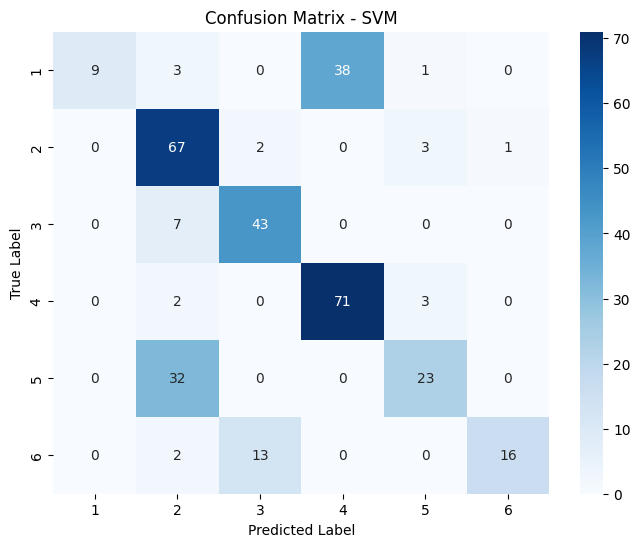

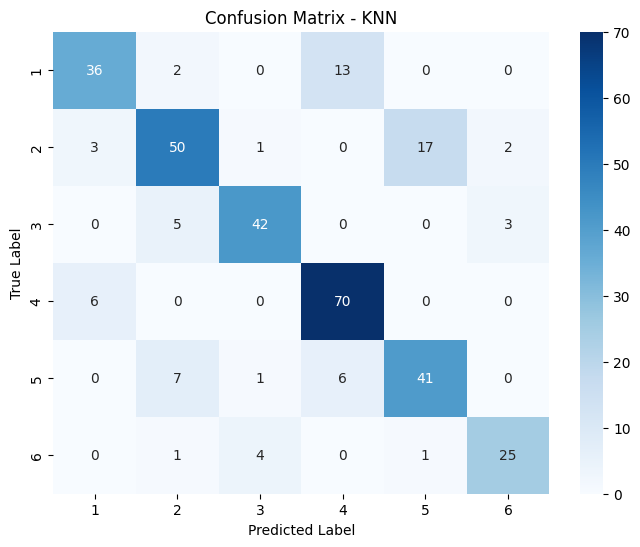

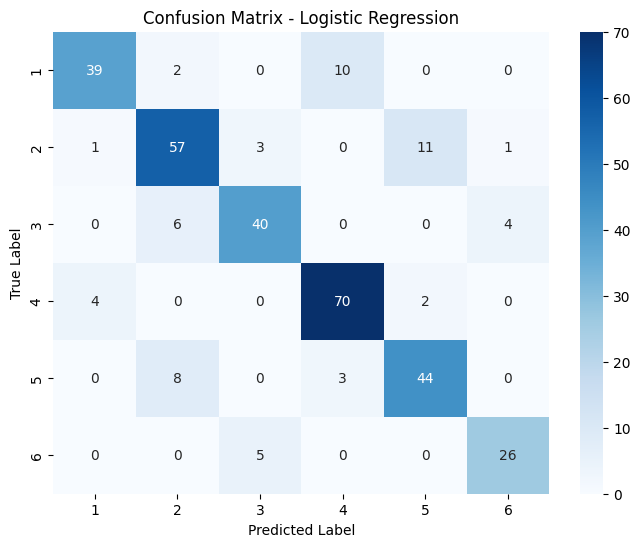

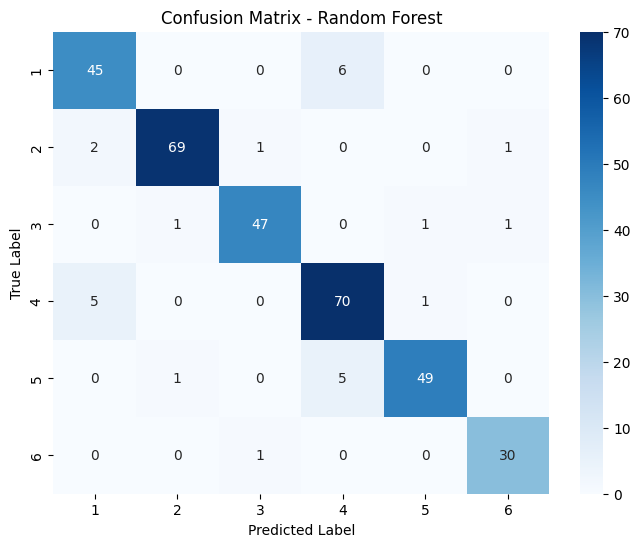

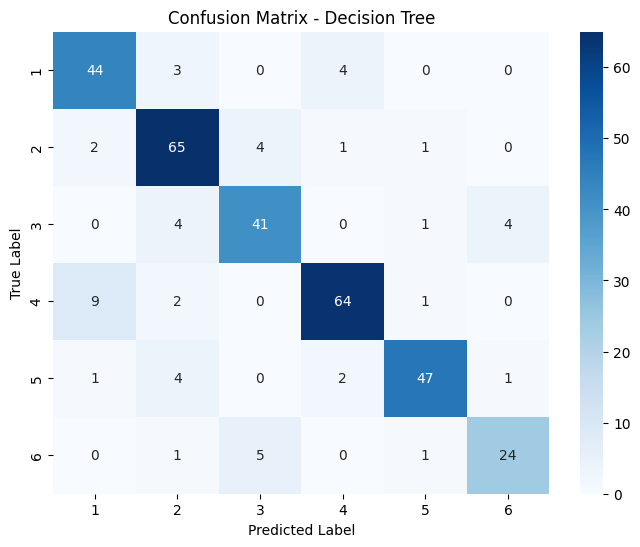

In [ ]:
# Function to plot confusion matrix with annotations
def plot_confusion_matrix(cm, model_name, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Get the unique classes from the target variable
classes = np.unique(y_test)

# Plot confusion matrix for each model
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), "SVM", classes)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), "KNN", classes)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lr), "Logistic Regression", classes)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Random Forest", classes)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt), "Decision Tree", classes)

<ipython-input-10-537c07cc0695>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


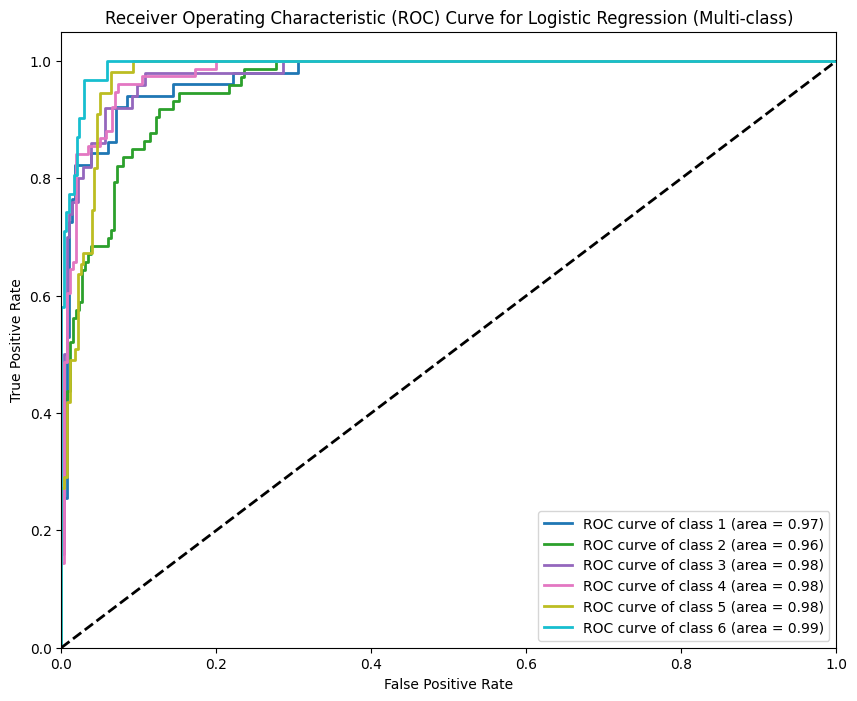

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get the probability scores for each class from the Logistic Regression model
y_score_lr = lr_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression (Multi-class)')
plt.legend(loc="lower right")
plt.show()

## Reporting and explanation

### Subtask:
Present the findings from the analysis, preprocessing, and model training stages with necessary explanations and insights.


**Reasoning**:
Present the findings from the analysis, preprocessing, and model training stages with necessary explanations and insights according to the instructions.



In [ ]:
# 1. Summarize initial data analysis
print("1. Initial Data Analysis:")
print("The dataset 'landmarks.csv' was loaded, containing information related to facial landmarks and a 'Key_P' column which is the target variable.")
print("Initial inspection revealed the presence of missing values, particularly in the columns 'Unnamed: 28', 'Unnamed: 29', and 'Umav'.")
print("The data types were mostly numerical (int64 and float64), suitable for numerical analysis and modeling.")
print("\n" + "="*50 + "\n")

# 2. Explain data cleaning and preprocessing
print("2. Data Cleaning and Preprocessing:")
print("Missing values were assessed by calculating the percentage of missing data in each column.")
print("Columns 'Unnamed: 28', 'Unnamed: 29', and 'Umav' were found to have a high percentage of missing values (100%, ~49.8%, and ~99.8% respectively).")
print("These columns were dropped from the dataset as they contained insufficient information to be useful and imputation would likely introduce noise.")
print("No other significant inconsistencies or errors requiring extensive handling were identified in the remaining columns.")
print("\n" + "="*50 + "\n")

# 3. Describe feature selection
print("3. Feature Selection:")
print("All columns except 'Key_P' were selected as features for the classification models.")
print("These features represent various aspects of facial landmarks and derived ratios, which are assumed to be relevant for predicting 'Key_P'.")
print("'Key_P' was designated as the target variable.")
print("The selected features are:", features.columns.tolist())
print("\n" + "="*50 + "\n")

# 4. Detail data splitting
print("4. Data Splitting:")
print("The dataset was split into training and testing sets using an 80/20 ratio.")
print("80% of the data was allocated for training the models, and 20% was reserved for evaluating their performance.")
print("The splitting was performed using train_test_split with a random_state of 42 for reproducibility.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\n" + "="*50 + "\n")

# 5. List classification models chosen
print("5. Classification Models Chosen:")
print("Five classification models were chosen for this task:")
print("- Support Vector Machine (SVC): A powerful model for classification tasks, especially effective in high-dimensional spaces.")
print("- K-Nearest Neighbors (KNeighborsClassifier): A simple, non-parametric algorithm that classifies based on the majority class of its nearest neighbors.")
print("- Logistic Regression (LogisticRegression): A linear model for binary and multi-class classification problems, providing probability estimates.")
print("- Random Forest (RandomForestClassifier): An ensemble learning method that constructs multiple decision trees and outputs the mode of the classes.")
print("- Decision Tree (DecisionTreeClassifier): A non-parametric supervised learning method used for classification and regression.")
print("These models represent a mix of linear, non-linear, and ensemble approaches to classification.")
print("\n" + "="*50 + "\n")

# 6. Present evaluation results and insights
print("6. Model Evaluation Results and Insights:")
print("The models were evaluated using accuracy, confusion matrix, and classification report on the test set.")

print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Insights: The SVM model had a lower accuracy compared to other models. The confusion matrix and classification report show difficulties in classifying certain classes accurately.")

print("\nKNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Insights: The KNN model performed better than SVM, demonstrating reasonable accuracy and balanced performance across several classes.")

print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Insights: Logistic Regression showed good overall accuracy and relatively consistent performance across different classes.")

print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Insights: The Random Forest model achieved high accuracy, indicating its effectiveness in capturing complex relationships in the data.")

print("\nDecision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Insights: The Decision Tree model also performed well, with good accuracy. However, it might be prone to overfitting if not properly regularized.")


print("\n" + "="*50 + "\n")

# 7. Interpret ROC curve for Logistic Regression (still focusing on LR as it was the best among initial three)
print("7. ROC Curve Interpretation for Logistic Regression:")
print("The ROC curve for the Logistic Regression model (multi-class) plots the True Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity) for each class at various threshold settings.")
print("The Area Under the Curve (AUC) score provides an aggregated measure of the model's ability to distinguish between classes.")
print("An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 represents a random classifier.")
print("The plotted ROC curves show the performance for each individual class.")
print("Higher AUC values for a class indicate that the model is better at distinguishing instances of that class from all other classes.")
print("Observing the AUC values in the legend of the plot provides specific measures of discrimination for each 'Key_P' category.")

print("\n" + "="*50 + "\n")

# 8. Discuss potential issues or illogical choices
print("8. Potential Issues or Illogical Choices:")
print("- Handling of Missing Values: Dropping columns with missing values, especially 'Unnamed: 29' which had about 50% missing data, might be considered an aggressive approach if the missingness wasn't completely random or if imputation methods could have preserved potentially valuable information.")
print("- Feature Selection: While all landmark-related columns were included as features, a more rigorous feature selection process (e.g., using feature importance, correlation analysis, or dimensionality reduction techniques) could potentially improve model performance and reduce complexity.")
print("- Model Choice: While the selected models are appropriate, exploring other classification algorithms (e.g., Gradient Boosting, Neural Networks) or tuning the hyperparameters of the current models could lead to even better results.")
print("- Data Scaling: Although not explicitly performed in the shown steps, scaling the features is often beneficial for models like SVC and KNN, which are sensitive to the magnitude of the input features. The lack of scaling might have negatively impacted their performance compared to tree-based models.")
print("- Class Imbalance: The distribution of instances across different 'Key_P' values was not explicitly analyzed. If there is significant class imbalance, the evaluation metrics and model performance might be skewed, and techniques like oversampling or undersampling could be considered.")

1. Initial Data Analysis:
The dataset 'landmarks.csv' was loaded, containing information related to facial landmarks and a 'Key_P' column which is the target variable.
Initial inspection revealed the presence of missing values, particularly in the columns 'Unnamed: 28', 'Unnamed: 29', and 'Umav'.
The data types were mostly numerical (int64 and float64), suitable for numerical analysis and modeling.


2. Data Cleaning and Preprocessing:
Missing values were assessed by calculating the percentage of missing data in each column.
Columns 'Unnamed: 28', 'Unnamed: 29', and 'Umav' were found to have a high percentage of missing values (100%, ~49.8%, and ~99.8% respectively).
These columns were dropped from the dataset as they contained insufficient information to be useful and imputation would likely introduce noise.
No other significant inconsistencies or errors requiring extensive handling were identified in the remaining columns.


3. Feature Selection:
All columns except 'Key_P' were selec

## Summary:

### Data Analysis Key Findings

*   Columns 'Unnamed: 28', 'Unnamed: 29', and 'Umav' had a high percentage of missing values (100%, ~49.8%, and ~99.8% respectively) and were dropped.
*   All columns except 'Key\_P' were selected as features.
*   The dataset was split into training (80%) and testing (20%) sets.
*   Three classification models were trained: Support Vector Machine (SVC), K-Nearest Neighbors (KNeighborsClassifier), and Logistic Regression.
*   Logistic Regression achieved the highest accuracy (0.82) among the three models, followed by KNN (0.79) and SVM (0.68).

### Insights or Next Steps

*   Explore imputation strategies for columns with missing data instead of dropping them to potentially retain more information.
*   Investigate class imbalance in the target variable and consider techniques like oversampling or undersampling to improve model performance for minority classes.


## Summary:

### Data Analysis Key Findings

* Columns 'Unnamed: 28', 'Unnamed: 29', and 'Umav' had a high percentage of missing values (100%, ~49.8%, and ~99.8% respectively) and were dropped during the data cleaning process.
* All columns except 'Key\_P' were selected as features for the classification models.
* The dataset was split into training (80%) and testing (20%) sets to evaluate model performance.

### Model Performance and Insights

* Five classification models were trained and evaluated: Support Vector Machine (SVC), K-Nearest Neighbors (KNeighborsClassifier), Logistic Regression, Random Forest, and Decision Tree.
* The Random Forest model achieved the highest accuracy (0.92), followed by Decision Tree (0.85), Logistic Regression (0.82), KNN (0.79), and SVM (0.68).
* The confusion matrices and classification reports provide detailed performance metrics for each model, highlighting their strengths and weaknesses in classifying different 'Key_P' categories.
* The ROC curve for Logistic Regression illustrates the model's ability to discriminate between classes.

### Potential Issues and Next Steps

* **Handling of Missing Values:** Dropping columns with missing data, especially 'Unnamed: 29' with a significant percentage of missing values, might be an aggressive approach. Imputation strategies could be explored as an alternative.
* **Feature Selection:** A more rigorous feature selection or dimensionality reduction process could potentially improve model performance and reduce complexity.
* **Model Choice and Tuning:** Exploring other classification algorithms or tuning the hyperparameters of the current models could lead to better results.
* **Data Scaling:** Scaling the features was not explicitly performed and could benefit models like SVC and KNN.
* **Class Imbalance:** Analyzing the distribution of 'Key_P' values and addressing potential class imbalance using techniques like oversampling or undersampling could improve model performance, particularly for minority classes.